In [1]:
# Ratings:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# pulling data

data = pd.read_csv("../output_data/clean_data_for_analysis.csv")
#print(data["Title"].count())
data.head()


,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,167885588.0,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,257212.0,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1849718.0,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,119942387.0,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,20657.0,others


In [2]:
# Filtering and adding
data["Release"] = data["Release"].astype("datetime64")
data["Year"] = data["Release"].dt.year
data["Month"] = data["Release"].dt.month
data["Year"] = data["Year"].astype("str")
data["Month"] = data["Month"].astype("int")

runtime_mins= data["Runtime"]/60
data["Runtime Mins"] = runtime_mins

#data.count()
#data.dtypes

# Records = 1153

In [3]:
# Filtering by source box or netflix

box = data.loc[data["Gross"] > 0,:]
#box.count()
# Records = 837

nf = data.loc[data["Platform"] == "netflix",:]
#nf.count()
# Records = 151

<function matplotlib.pyplot.show(*args, **kw)>

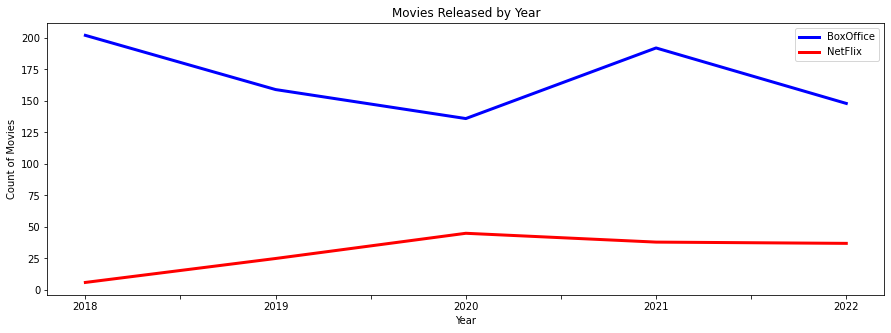

In [4]:
# Movie count 

box_count = box.groupby(["Year"]).count()["Title"]
#box_count

nf_count = nf.groupby(["Year"]).count()["Title"]
#nf_count

movie_count_df = pd.DataFrame({"BoxOffice": box_count, "NetFlix": nf_count})
#movie_count_df

movie_count_df.plot(kind="line", figsize=(15,5), color=["b","r"], linewidth=3)
plt.title("Movies Released by Year")
plt.xlabel("Year")
plt.ylabel("Count of Movies")
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

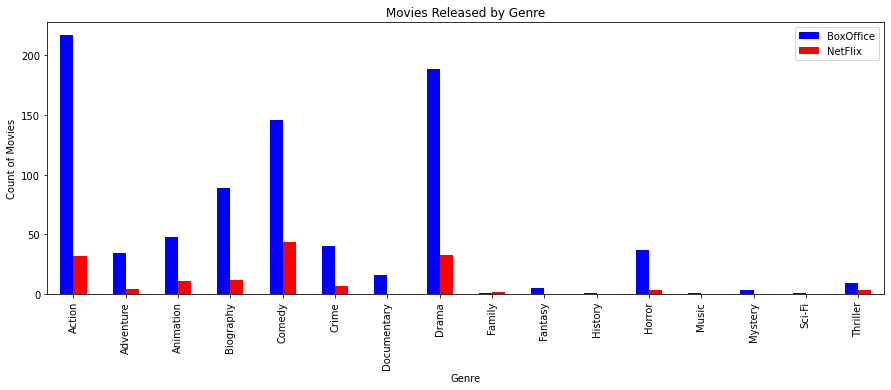

In [5]:
# Movie count - by genre 

box_count_genre = box.groupby(["Genre"]).count()["Title"]
#box_count_genre

nf_count_genre = nf.groupby(["Genre"]).count()["Title"]
#nf_count_genre

movie_genre_df = pd.DataFrame({"BoxOffice": box_count_genre, "NetFlix": nf_count_genre})
#movie_count_df

movie_genre_df.plot(kind="bar", figsize=(15,5), color=["b","r"])
plt.title("Movies Released by Genre")
plt.xlabel("Genre")
plt.ylabel("Count of Movies")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

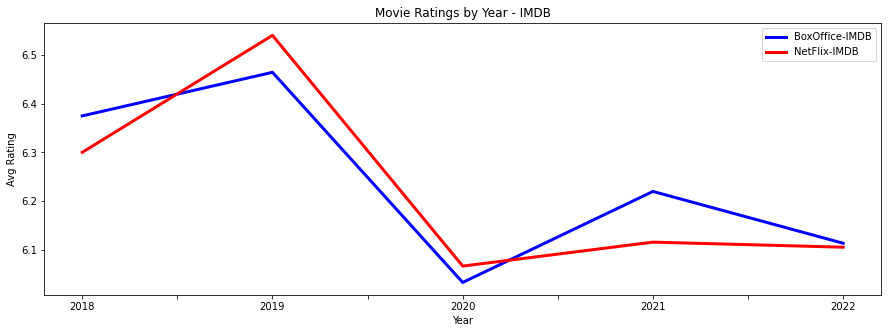

In [6]:
# IMDB Ratings 

box_imdb = box.groupby(["Year"]).mean()["imdbRating"] 
#box_imdb

nf_imdb = nf.groupby(["Year"]).mean()["imdbRating"] 
#nf_imdb

imdb_df = pd.DataFrame({"BoxOffice-IMDB": box_imdb, "NetFlix-IMDB": nf_imdb})
#imdb_df

imdb_df.plot(kind="line", figsize=(15,5), color=["b","r"], linewidth=3)
plt.title("Movie Ratings by Year - IMDB")
plt.xlabel("Year")
plt.ylabel("Avg Rating")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

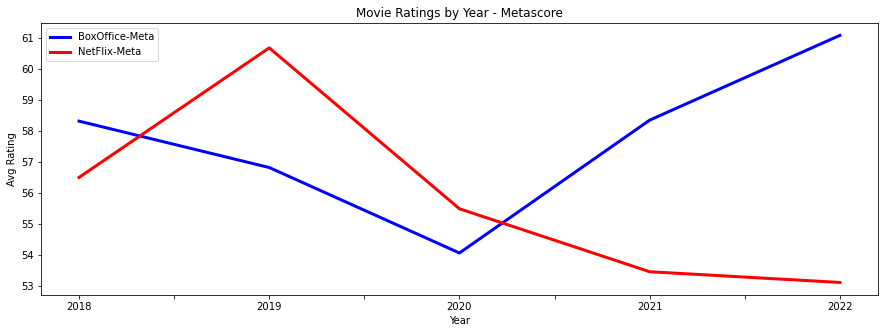

In [7]:
# Meta Ratings 

box_meta = box.groupby(["Year"]).mean()["Metascore"]
#box_meta

nf_meta = nf.groupby(["Year"]).mean()["Metascore"] 
#nf_meta

meta_df = pd.DataFrame({"BoxOffice-Meta": box_meta, "NetFlix-Meta": nf_meta})
#meta_df

meta_df.plot(kind="line", figsize=(15,5), color=["b","r"], linewidth=3)
plt.title("Movie Ratings by Year - Metascore")
plt.xlabel("Year")
plt.ylabel("Avg Rating")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

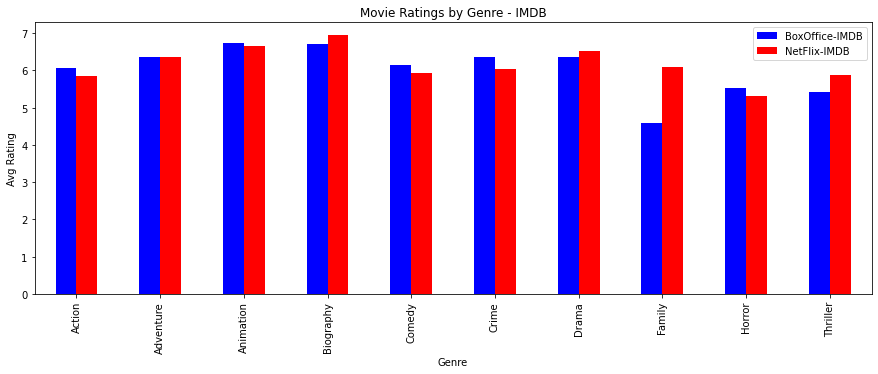

In [8]:
# IMDB Ratings - by genre

box_genre_total_imdb = box.groupby(["Genre",]).mean()["imdbRating"]
#box_genre_total_imdb

nf_genre_total_imdb = nf.groupby(["Genre",]).mean()["imdbRating"]
#nf_genre_total_imdb

imdb_genre_total_imdb_df = pd.DataFrame({"BoxOffice-IMDB": box_genre_total_imdb, "NetFlix-IMDB": nf_genre_total_imdb})
#imdb_genre_total_imdb_df

imdb_good = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", "Family", "Horror", "Thriller"]
imdb_genre_total_good_df = imdb_genre_total_imdb_df.loc[imdb_good, :]
#imdb_genre_total_good_df

imdb_genre_total_good_df.plot(kind="bar", figsize=(15,5), color=["b","r"])
plt.title("Movie Ratings by Genre - IMDB")
plt.xlabel("Genre")
plt.ylabel("Avg Rating")
plt.show





<function matplotlib.pyplot.show(*args, **kw)>

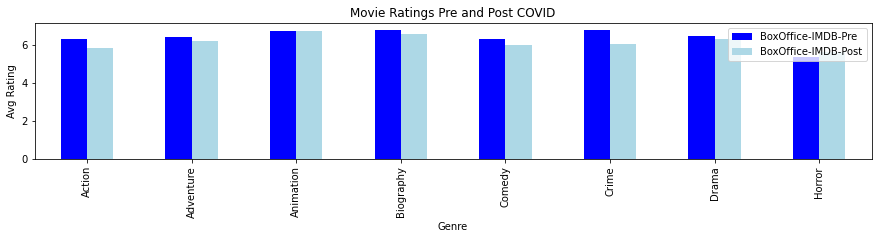

In [131]:
# IMBD Ratings - Box by genre pre and post

box_18 = box.loc[box["Year"] == "2018",:]
box_imdb_18_sum = box_18.groupby(["Genre"]).sum()["imdbRating"]
box_imdb_18_count = box_18.groupby(["Genre"]).count()["imdbRating"]
#box_imdb_18_count

box_19 = box.loc[box["Year"] == "2019",:]
box_imdb_19_sum = box_19.groupby(["Genre"]).sum()["imdbRating"]
box_imdb_19_count = box_19.groupby(["Genre"]).count()["imdbRating"]
#box_imdb_19_count

box_imdb_genre_pre_df = pd.DataFrame({"BO-18-Sum":box_imdb_18_sum, "BO-18-Count":box_imdb_18_count,"BO-19-Sum":box_imdb_19_sum, "BO-19-Count":box_imdb_19_count})
#box_imdb_genre_pre_df

imdb_good = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", "Horror"]
box_imdb_genre_good_pre_df = box_imdb_genre_pre_df.loc[imdb_good, :]
#box_imdb_genre_good_pre_df.dtypes

pre_avg_box = (box_imdb_genre_good_pre_df["BO-18-Sum"] + box_imdb_genre_good_pre_df["BO-19-Sum"])/(box_imdb_genre_good_pre_df["BO-18-Count"] + box_imdb_genre_good_pre_df["BO-19-Count"])
#pre_avg_box

box_20 = box.loc[box["Year"] == "2020",:]
box_imdb_20_sum = box_20.groupby(["Genre"]).sum()["imdbRating"]
box_imdb_20_count = box_20.groupby(["Genre"]).count()["imdbRating"]
#box_imdb_20_count

box_21 = box.loc[box["Year"] == "2021",:]
box_imdb_21_sum = box_21.groupby(["Genre"]).sum()["imdbRating"]
box_imdb_21_count = box_21.groupby(["Genre"]).count()["imdbRating"]
#box_imdb_21_count

box_22 = box.loc[box["Year"] == "2022",:]
box_imdb_22_sum = box_22.groupby(["Genre"]).sum()["imdbRating"]
box_imdb_22_count = box_22.groupby(["Genre"]).count()["imdbRating"]
#box_imdb_22_count

box_imdb_genre_post_df = pd.DataFrame({"BO-20-Sum":box_imdb_20_sum, "BO-21-Sum":box_imdb_21_sum, "BO-22-Sum":box_imdb_22_sum,"BO-20-Count":box_imdb_20_count, "BO-21-Count":box_imdb_21_count, "BO-22-Count":box_imdb_22_count, })
#box_imdb_genre_post_df

imdb_good = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", "Horror"]
box_imdb_genre_good_post_df = box_imdb_genre_post_df.loc[imdb_good, :]
#box_imdb_genre_good_post_df.dtypes

post_avg_box = (box_imdb_genre_good_post_df["BO-20-Sum"] + box_imdb_genre_good_post_df["BO-21-Sum"] + box_imdb_genre_good_post_df["BO-22-Sum"])/(box_imdb_genre_good_post_df["BO-20-Count"] + box_imdb_genre_good_post_df["BO-21-Count"] + box_imdb_genre_good_post_df["BO-22-Count"])
#post_avg_box

box_imdb_genre_df_combined = pd.DataFrame({"BoxOffice-IMDB-Pre": pre_avg_box, "BoxOffice-IMDB-Post": post_avg_box})
box_imdb_genre_df_combined

box_imdb_genre_df_combined.plot(kind="bar", figsize=(15,2.5), color=("b", "lightblue"))
plt.title("Movie Ratings Pre and Post COVID")
plt.xlabel("Genre")
plt.ylabel("Avg Rating")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

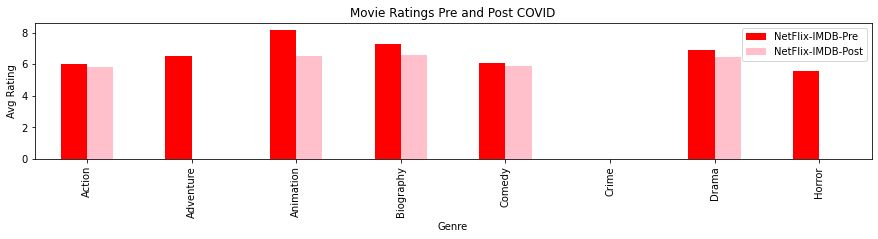

In [129]:
# IMBD Ratings - nf by genre pre and post

nf_18 = nf.loc[nf["Year"] == "2018",:]
nf_imdb_18_sum = nf_18.groupby(["Genre"]).sum()["imdbRating"]
nf_imdb_18_count = nf_18.groupby(["Genre"]).count()["imdbRating"]
#nf_imdb_18_count

nf_19 = nf.loc[nf["Year"] == "2019",:]
nf_imdb_19_sum = nf_19.groupby(["Genre"]).sum()["imdbRating"]
nf_imdb_19_count = nf_19.groupby(["Genre"]).count()["imdbRating"]
nf_imdb_19_count

nf_imdb_genre_pre_df_all = pd.DataFrame({"NF-18-Sum":nf_imdb_18_sum, "NF-18-Count":nf_imdb_18_count,"NF-19-Sum":nf_imdb_19_sum, "NF-19-Count":nf_imdb_19_count})
nf_imdb_genre_pre_df_all
nf_imdb_genre_pre_df = nf_imdb_genre_pre_df_all.fillna(0)
nf_imdb_genre_pre_df

imdb_good = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Drama", "Horror"]
nf_imdb_genre_good_pre_df = nf_imdb_genre_pre_df.loc[imdb_good, :]
nf_imdb_genre_good_pre_df.dtypes

pre_avg_nf = (nf_imdb_genre_good_pre_df["NF-18-Sum"] + nf_imdb_genre_good_pre_df["NF-19-Sum"])/(nf_imdb_genre_good_pre_df["NF-18-Count"] + nf_imdb_genre_good_pre_df["NF-19-Count"])
pre_avg_nf

nf_20 = nf.loc[nf["Year"] == "2020",:]
nf_imdb_20_sum = nf_20.groupby(["Genre"]).sum()["imdbRating"]
nf_imdb_20_count = nf_20.groupby(["Genre"]).count()["imdbRating"]
nf_imdb_20_count

nf_21 = nf.loc[nf["Year"] == "2021",:]
nf_imdb_21_sum = nf_21.groupby(["Genre"]).sum()["imdbRating"]
nf_imdb_21_count = nf_21.groupby(["Genre"]).count()["imdbRating"]
nf_imdb_21_count

nf_22 = nf.loc[nf["Year"] == "2022",:]
nf_imdb_22_sum = nf_22.groupby(["Genre"]).sum()["imdbRating"]
nf_imdb_22_count = nf_22.groupby(["Genre"]).count()["imdbRating"]
nf_imdb_22_count

nf_imdb_genre_post_df = pd.DataFrame({"NF-20-Sum":nf_imdb_20_sum, "NF-21-Sum":nf_imdb_21_sum, "NF-22-Sum":nf_imdb_22_sum,"NF-20-Count":nf_imdb_20_count, "NF-21-Count":nf_imdb_21_count, "NF-22-Count":nf_imdb_22_count, })
nf_imdb_genre_post_df

imdb_good = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Drama", "Horror"]
nf_imdb_genre_good_post_df = nf_imdb_genre_post_df.loc[imdb_good, :]
#nf_imdb_genre_good_post_df.dtypes

post_avg_nf = (nf_imdb_genre_good_post_df["NF-20-Sum"] + nf_imdb_genre_good_post_df["NF-21-Sum"] + nf_imdb_genre_good_post_df["NF-22-Sum"])/(nf_imdb_genre_good_post_df["NF-20-Count"] + nf_imdb_genre_good_post_df["NF-21-Count"] + nf_imdb_genre_good_post_df["NF-22-Count"])
#post_avg_nf

nf_imdb_genre_df_combined = pd.DataFrame({"NetFlix-IMDB-Pre": pre_avg_nf, "NetFlix-IMDB-Post": post_avg_nf})
#nf_imdb_genre_df_combined

nf_imdb_genre_df_combined = nf_imdb_genre_df_combined.reset_index(drop=False)
#nf_imdb_genre_df_combined
crime = {"index":"Crime", "NetFlix-IMDB-Pre": 0, "NetFlix-IMDB-Post": 0}
nf_imdb_genre_df_combined = nf_imdb_genre_df_combined.append(crime, ignore_index = True)
nf_imdb_genre_df_combined2 = nf_imdb_genre_df_combined.sort_values(["index"])
nf_imdb_genre_df_combined2 = nf_imdb_genre_df_combined.sort_values(["index"])
nf_imdb_genre_df_combined2 = nf_imdb_genre_df_combined2.set_index("index")

nf_imdb_genre_df_combined2.plot(kind="bar", figsize=(15,2.5), color=("r", "pink"))
plt.title("Movie Ratings Pre and Post COVID")
plt.xlabel("Genre")
plt.ylabel("Avg Rating")
plt.show

In [10]:
# # IMBD Ratings - by genre by year

# box_imdb_genre = box.groupby(["Genre", "Year"]).mean()["imdbRating"]
# #box_imdb_genre

# nf_imdb_genre = nf.groupby(["Genre", "Year"]).mean()["imdbRating"]
# #nf_imdb_genre

# imdb_genre_df = pd.DataFrame({"BoxOffice-IMDB": box_imdb_genre, "NetFlix-IMDB": nf_imdb_genre})
# imdb_genre_df

# imdb_genre_df.plot(kind="bar", figsize=(15,3.5))
# plt.title("Movie Ratings Over Time")
# plt.xlabel("Year")
# plt.ylabel("Avg Rating")
# plt.show


<function matplotlib.pyplot.show(*args, **kw)>

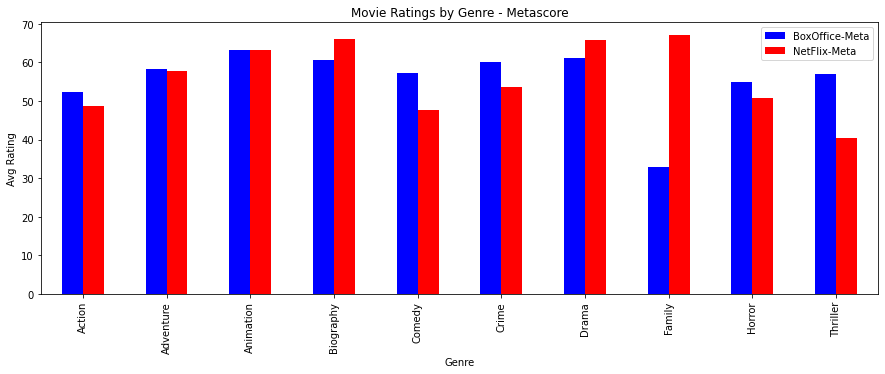

In [11]:
# Meta Ratings - by genre

box_genre_total_meta = box.groupby(["Genre",]).mean()["Metascore"]
#box_genre_total_meta

nf_genre_total_meta = nf.groupby(["Genre",]).mean()["Metascore"]
#nf_genre_total_meta

meta_genre_total_df = pd.DataFrame({"BoxOffice-Meta": box_genre_total_meta, "NetFlix-Meta": nf_genre_total_meta})
meta_genre_total_df

meta_good = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", "Family", "Horror", "Thriller"]
meta_genre_total_good_df = meta_genre_total_df.loc[meta_good, :]
meta_genre_total_good_df

meta_genre_total_good_df.plot(kind="bar", figsize=(15,5), color=["b","r"])
plt.title("Movie Ratings by Genre - Metascore")
plt.xlabel("Genre")
plt.ylabel("Avg Rating")
plt.show

In [12]:
# # Meta Ratings - by genre by year

# box_meta_genre = box.groupby(["Genre", "Year"]).mean()["Metascore"]
# #box_meta_genre

# nf_meta_genre = nf.groupby(["Genre", "Year"]).mean()["Metascore"]
# #nf_meta_genre

# meta_genre_df = pd.DataFrame({"BoxOffice-Meta": box_meta_genre, "NetFlix-Meta": nf_meta_genre})
# meta_genre_df

# imdb_genre_df.plot(kind="bar", figsize=(15,3.5))
# plt.title("Movie Ratings Over Time")
# plt.xlabel("Year")
# plt.ylabel("Avg Rating")
# plt.show


In [13]:
# # Movie count - by genre by year 

# fam = ["Family"]

# box_count_genre_year = box.groupby(["Genre", "Year"]).count()["Title"]
# #box_count_genre_year

# nf_count_genre_year = nf.groupby(["Genre", "Year"]).count()["Title"]
# #nf_count_genre_year

# count_genre_year_df = pd.DataFrame({"BoxOffice-IMDB": box_count_genre_year, "NetFlix-IMDB": nf_count_genre_year})
# #count_genre_year_df

# # count_genre_year_df.plot(kind="line", figsize=(15,3.5))
# # plt.title("Movie Ratings Over Time")
# # plt.xlabel("Year")
# # plt.ylabel("Avg Rating")
# # plt.show


<function matplotlib.pyplot.show(*args, **kw)>

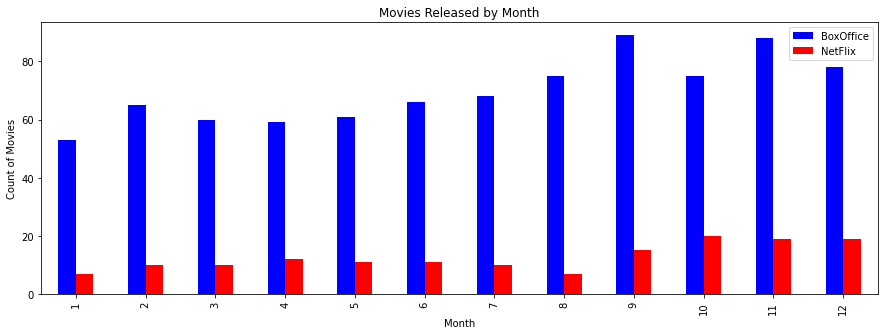

In [14]:
# Movie count - by month

box_count_month = box.groupby(["Month"]).count()["Title"]
#box_count_month

nf_count_month = nf.groupby(["Month"]).count()["Title"]
#nf_count_month

movie_month_df = pd.DataFrame({"BoxOffice": box_count_month, "NetFlix": nf_count_month})
movie_month_df = movie_month_df.sort_values(["Month"])
#movie_month_df

movie_month_df.plot(kind="bar", figsize=(15,5), color=["b","r"])
plt.title("Movies Released by Month")
plt.xlabel("Month")
plt.ylabel("Count of Movies")
plt.show

In [15]:
# Run Time - year

# box_runtime_year = box.groupby(["Year",]).mean()["Runtime Mins"]
# #box_runtime_year

# nf_runtime_year = nf.groupby(["Year",]).mean()["Runtime Mins"]
# #nf_runtime_year

# runtime_year_df = pd.DataFrame({"BoxOffice": box_runtime_year, "NetFlix": nf_runtime_year})
# #runtime_year_df

# runtime_year_df.plot(kind="bar", figsize=(15,3.5))
# plt.title("US Movies Released by Runtime")
# plt.xlabel("Year")
# plt.ylabel("Avg Runtime in Mins")
# plt.show


In [16]:
# # Runtime - by genre

# box_runtime_genre = box.groupby(["Genre",]).mean()["Runtime Mins"]
# #box_runtime_genre

# nf_runtime_genre = nf.groupby(["Genre",]).mean()["Runtime Mins"]
# #nf_runtime_genre

# runtime_genre_df = pd.DataFrame({"BoxOffice": box_runtime_genre, "NetFlix": nf_runtime_genre})
# #runtime_genre_df

# good = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", "Family", "Horror", "Thriller"]
# runtime_total_good_df = runtime_genre_df.loc[good, :]
# #genre_total_good_df

# runtime_total_good_df.plot(kind="bar", figsize=(15,3.5))
# plt.title("US Movies Released by Runtime")
# plt.xlabel("Genre")
# plt.ylabel("Avg Runtime in Mins")
# plt.show